<a href="https://colab.research.google.com/github/Tounsix/NLP_Assignment_3/blob/main/Sentiment_analysis_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sentiment analysis :Machine learning based methods

In [ ]:
import pandas as pd
import re
from transformers import pipeline
from tqdm import tqdm
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Load the CSV
df = pd.read_csv("tweets-data.csv")

# Extend stopword list with French, Spanish, and common filler words
custom_stopwords = set(ENGLISH_STOP_WORDS).union({
    'de', 'la', 'le', 'du', 'des', 'une', 'un', 'et', 'en', 'au', 'avec', 'que', 'qui',
    'el', 'lo', 'los', 'las', 'para', 'por', 'del', 'con', 'sin', 'es', 'y', 'o', 'se',
    'da', 'di', 'il', 'non', 'cest', 'ce', 'les', 'mais', 'dans', 'comme'
})

def clean_text(text):
    text = re.sub(r"http\S+|@\S+|#\S+", "", text)  # remove URLs, mentions, hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)        # remove punctuation, numbers, etc.
    tokens = text.lower().split()                  # tokenize and lowercase
    tokens = [word for word in tokens if word not in custom_stopwords]
    return " ".join(tokens)

# Apply the updated function
df["cleaned_tweet"] = df["Tweets"].astype(str).apply(clean_text)

# Load Transformers sentiment pipeline
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Apply the model
results = []
for text in tqdm(df["cleaned_tweet"][:500]):  # only use a sample of 500
    result = classifier(text[:512])[0]  # limit to 512 tokens
    results.append((result["label"], result["score"]))

# Add to DataFrame
df.loc[:499, "sentiment_label_transformer"] = [r[0].lower() for r in results]
df.loc[:499, "sentiment_score_transformer"] = [r[1] for r in results]

# Show result sample
print(df[["Tweets", "sentiment_label_transformer", "sentiment_score_transformer"]].head())

# Save results
df.to_csv("tweets_sentiment_transformer_output.csv", index=False)

Device set to use cpu
100%|██████████| 500/500 [00:51<00:00,  9.64it/s]

                                              Tweets  \
0  @jacksonhinklle #wagner with 6.2 billion dolla...   
1  Pobrecito es discapacitado\n#Reddetuiterosdemo...   
2  News from the EIR Daily Alert\n\n“#Putin Addre...   
3  It's Messi day #Messi𓃵 #Messi36 #Russia #bigst...   
4  Il passaggio chiave di Machiavelli era questo ...   

  sentiment_label_transformer  sentiment_score_transformer  
0                    positive                     0.999244  
1                    negative                     0.854909  
2                    negative                     0.878521  
3                    negative                     0.999102  
4                    positive                     0.939751  


In [ ]:
df.head()

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweets,hashtag,cleaned_tweet,sentiment_label_transformer,sentiment_score_transformer
0,0,2023-06-25 19:16:20+00:00,0,NaN,@jacksonhinklle #wagner with 6.2 billion dolla...,wagner,billion dollar,positive,0.999244
1,1,2023-06-25 19:16:18+00:00,0,NaN,Pobrecito es discapacitado\n#Reddetuiterosdemo...,wagner,pobrecito discapacitado,negative,0.854909
2,2,2023-06-25 19:16:07+00:00,0,NaN,News from the EIR Daily Alert\n\n“#Putin Addre...,wagner,news eir daily alert addressed people armed ju...,negative,0.878521
3,3,2023-06-25 19:15:56+00:00,0,NaN,It's Messi day #Messi𓃵 #Messi36 #Russia #bigst...,wagner,messi day,negative,0.999102
4,4,2023-06-25 19:15:54+00:00,0,NaN,Il passaggio chiave di Machiavelli era questo ...,wagner,passaggio chiave machiavelli era questo princi...,positive,0.939751


/tmp/ipython-input-9-1454394473.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[:500], x="sentiment_label_transformer", palette="coolwarm")


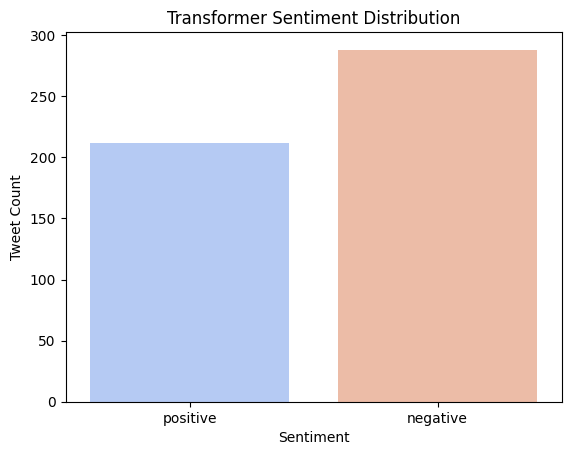

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df[:500], x="sentiment_label_transformer", palette="coolwarm")
plt.title("Transformer Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

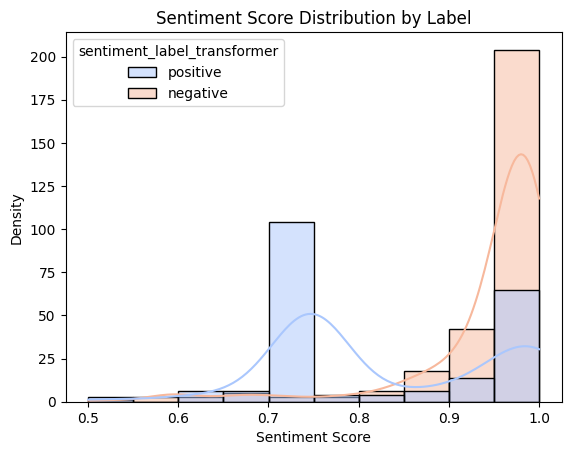

In [ ]:
sns.histplot(data=df[:500], x="sentiment_score_transformer", hue="sentiment_label_transformer", kde=True, palette="coolwarm")
plt.title("Sentiment Score Distribution by Label")
plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.show()

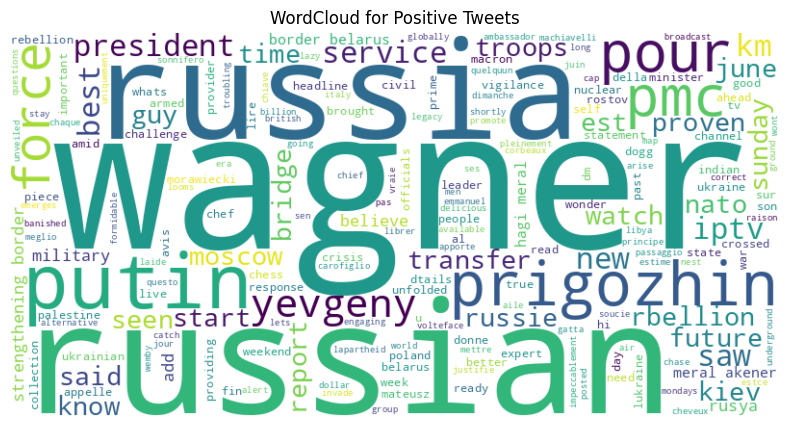

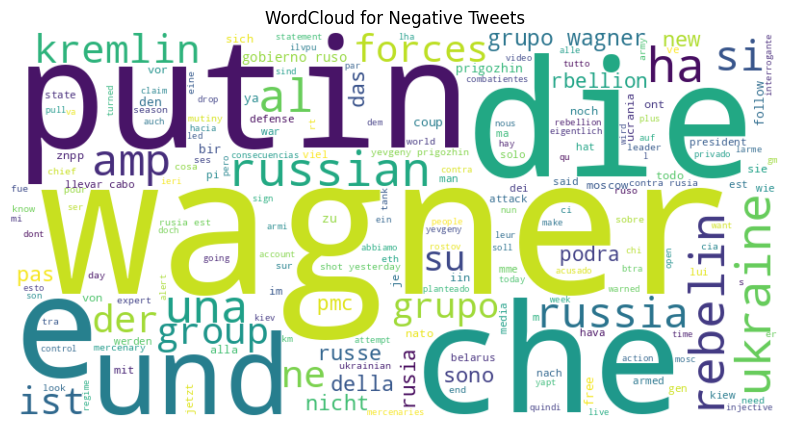

In [ ]:
from wordcloud import WordCloud

for label in ['positive', 'negative']:
    text = " ".join(df[df['sentiment_label_transformer'] == label]['cleaned_tweet'].dropna())
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud for {label.capitalize()} Tweets")
    plt.show()